In [3]:
import networkx as nx
import random
import numpy as np
import math 
import time
from copy import deepcopy
import matplotlib.pyplot as plt

# 不用轉換至 NetworkX 的方法
def get_one_network_result(N, round_num, neighbors_num):
    
    global b
    break_time = 90

    def f(nodes_set):   
        nonlocal all_nodes_set
        nonlocal revolt_nodes_record
        nonlocal round
        nonlocal neighbors
        nonlocal thresholds
        nonlocal break_time

        global b
        global start
        if time.time() - start > break_time: 
            b = True
            return set()
    
        revolt_nodes = set()
        
        if (nodes_set == all_nodes_set) and (round >= 2):
            for n in revolt_nodes_record[round-2]:
                revolt_nodes.add(n)

        for n in nodes_set:
            if n not in revolt_nodes:
                if nodes_set.issubset(neighbors[n-1]):
                    if len(nodes_set) >= thresholds[n-1]:
                        revolt_nodes.add(n)
                else:
                    if len(g((nodes_set & neighbors[n-1]))) >= thresholds[n-1]:
                        revolt_nodes.add(n)
                    
        return revolt_nodes
    
    def g(nodes_set):
        
        nonlocal break_time
        global b
        global start
        if time.time() - start > 10: 
            b = True
            return set()

        if len(nodes_set) == 1:
            return nodes_set
        else: 
            return f(nodes_set)

    # == 隨機產生 network (adjacent list) ==
    all_nodes_set = set(range(1, N+1))
    neighbors = []   
    for i in range(1, N+1):
        n = random.sample(list(all_nodes_set-{i}), neighbors_num)
        neighbors.append({i, *n})
    neighbors_at_t1 = deepcopy(neighbors)

    thresholds = []
    for i in range(1, N+1, 2):
        thresholds.append(int(i/2)+1)
        thresholds.append(int(i/2)+1)
        
    # print(all_nodes_set, neighbors, thresholds)
    # print(neighbors)

    # == 開始找出各個時間點(t)誰會revolt ==
    round = 1
    revolt_nodes_num = []
    revolt_nodes_record = []
    for i in range(round_num):
        if round != 1:
            # 讓自己所有 neighbor 的 neighbors，成為自己的 neighbor
            for i in range(1, N+1):
                for n in neighbors[i-1]:
                    if n != i:            
                        neighbors[i-1] = (neighbors[i-1] | neighbors_at_t1[n-1])
        revolt_nodes = g(all_nodes_set) 
        
        revolt_nodes_num.append(len(revolt_nodes))
        revolt_nodes_record.append(revolt_nodes)
        round += 1

        if b == True:
            break

    revolt_nodes_record = [list(s) for s in revolt_nodes_record]
    return revolt_nodes_num, revolt_nodes_record
    
def print_network(G, pos={}):   
    options = {
        # "font_size": 10,
        # "node_size": 1000,
        "arrowsize": 15,
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 2,
        "width": 1,
    }
    if pos: nx.draw_networkx(G, pos, **options)
    else: nx.draw_networkx(G, **options)
    ax = plt.gca()
    ax.margins(0.15)
    # plt.axis("off")
    plt.show()

# Part 1.

In [5]:
# set parameters
random.seed(6)
N = 30
neighbors_num = 2
round_num = 8
network_num = 2

records1 = []
records2 = []

for network in range(network_num):

    print(network+1)
    start = time.time()
    b = False
    revolt_nodes_num, revolt_nodes_record = get_one_network_result(N, round_num, neighbors_num)
    if b == False:
        records1.append(revolt_nodes_num)
        records2.append(revolt_nodes_record)

    # for x in list(locals().keys())[:]:
    #     if x[0] == "_":
    #         del locals()[x]
    # gc.collect()
records1

1
2


[[3, 3, 5, 21, 29, 30, 30, 30], [2, 3, 4, 12, 30, 30, 30, 30]]

## FIG. 5.

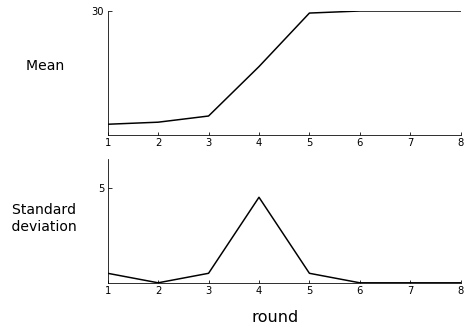

In [6]:
data = np.matrix(records1)
mean = np.array(np.mean(data, axis=0)).flatten()
sd = np.array(np.std(data, axis=0)).flatten()
x = list(range(1, round_num+1))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
ratio = 0.35

ax1.plot(x, mean, color='black')
ax2.plot(x, sd, color='black')

ax1.tick_params(direction="in")
ax1.set_ylim(0, 30)
ax1.set_yticks(np.array([30]))
ax1.set_xlim(1, 8)
xleft, xright = ax1.get_xlim()
ybottom, ytop = ax1.get_ylim()
ax1.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_ylabel("Mean                   ", rotation=0, y=0.5, fontsize=14)

ax2.tick_params(direction="in")
ax2.set_ylim(0, 6.5)
ax2.set_yticks(np.array([5]))
ax2.set_xlim(1, 8)
xleft, xright = ax2.get_xlim()
ybottom, ytop = ax2.get_ylim()
ax2.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel("Standard                      \n deviation                       ", rotation=0, y=0.4, fontsize=14)

plt.suptitle("round", y=0.05, fontsize=16)
plt.show()

## FIG. 6.

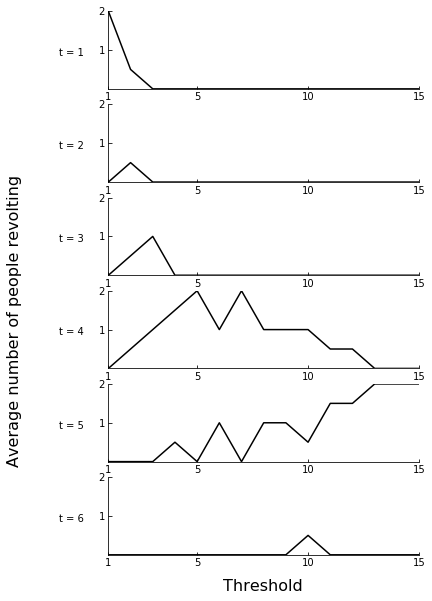

In [7]:
records2_first = deepcopy(records2)
for n, network in enumerate(records2):
    for round, revolter in enumerate(network, 1):
        if round != 1:
            records2_first[n][round-1] = set(revolter) - last_revolter
        last_revolter = set(revolter)


fig, (ax1, ax2, ax3, ax4, ax5, ax6)  = plt.subplots(6, 1, figsize=(15, 10))
x = list(range(1, 16))

round = 1
for ax in (ax1, ax2, ax3, ax4, ax5, ax6):
    y = [0 for i in range(15)]
    for network in records2_first:
        for node in network[round-1]:
            y[math.ceil(node/2)-1] += 1
    y = [i/network_num for i in y]
    ax.plot(x, y, color='black')

    ax.tick_params(direction="in")
    ax.set_ylim(0, 2)
    ax.set_yticks(np.array([1, 2]))
    ax.set_xlim(1, 15)
    ax.set_xticks(np.array([1, 5, 10, 15]))
    xleft, xright = ax.get_xlim()
    ybottom, ytop = ax.get_ylim()
    ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*0.25)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_ylabel("t = "+str(round)+"               ", rotation=0, y=0.4)

    round += 1

fig.text(0.275, 0.45, 'Average number of people revolting', va='center', rotation='vertical', fontsize=16)
fig.text(0.475, 0.075, 'Threshold', fontsize=16)

plt.show()

## FIG. 7. 

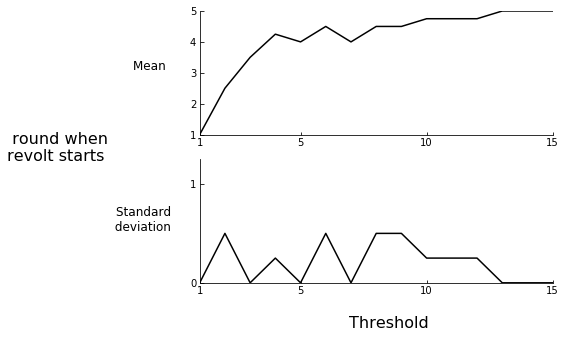

In [8]:
revolt_round = []
for network in records2_first:
    r = [0 for i in range(15)]
    for round in range(round_num):
        for node in network[round]:
            r[math.ceil(node/2)-1] += round+1 
    r = [i/2 for i in r]
    revolt_round.append(r)
            
data = np.matrix(revolt_round)
mean = np.array(np.mean(data, axis=0)).flatten()
sd = np.array(np.std(data, axis=0)).flatten()
x = list(range(1, len(revolt_round[0])+1))


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
ratio = 0.35

ax1.plot(x, mean, color='black')
ax2.plot(x, sd, color='black')

ax1.tick_params(direction="in")
ax1.set_ylim(1, 5)
ax1.set_yticks(np.array([1, 2, 3, 4, 5]))
ax1.set_xlim(1, 15)
ax1.set_xticks(np.array([1, 5, 10, 15]))
xleft, xright = ax1.get_xlim()
ybottom, ytop = ax1.get_ylim()
ax1.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_ylabel("Mean                   ", rotation=0, y=0.5, fontsize=12)

ax2.tick_params(direction="in")
ax2.set_ylim(0, 1.25)
ax2.set_yticks(np.array([0, 1]))
ax2.set_xlim(1, 15)
ax2.set_xticks(np.array([1, 5, 10, 15]))
xleft, xright = ax2.get_xlim()
ybottom, ytop = ax2.get_ylim()
ax2.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel("Standard                      \n deviation                       ", rotation=0, y=0.4, fontsize=12)

fig.text(0, 0.5, ' round when \nrevolt starts', va='center', fontsize=16)
fig.text(0.475, 0, 'Threshold', fontsize=16)
plt.show()

# Testing

In [ ]:
'''
G = nx.DiGraph()
# G.add_nodes_from([1, 2, 3, 4], threshold=3)
# G.add_edges_from([(1, 2), (2, 1), (1, 3), (3, 1), (2, 3), (3, 2), (3, 4), (4, 3)])  

G.add_nodes_from([1, 2, 3], threshold=2)
G.add_edges_from([(1, 3), (2, 3)]) 

# pos = {1: (0, 0), 2: (2, 0), 3: (1, -1)}
print_network(G)

nodes_set = set(G.nodes())
neighbors = []
thresholds = []
for n, nbrs in G.pred.items():
    neighbors.append({n} | set(nbrs))
    thresholds.append(G.nodes[n]["threshold"])
# print(nodes_set, neighbors, thresholds)

print("These person will revolt: ", *list(g(nodes_set)))
'''

In [ ]:
'''
# set parameters
random.seed(6)
N = 30
neighbors_num = 2
round_num = 8
network_num = 3

records = []
for network_num in range(network_num):
    
    # 隨機產生 network
    all_nodes = set(range(1, N+1))
    adjlist = []
    for i in range(1, N+1):
        l = str(i)
        n = random.sample(list(all_nodes-{i}), neighbors_num) # 定義每個 i 的 neighbors（誰給他資訊）-> predecessor not successors
        l += " " + str(n[0]) + " " + str(n[1])
        adjlist.append(l)
    # print(adjlist)
    G = nx.parse_adjlist(adjlist, nodetype=int, create_using=nx.DiGraph())
    # print_network(G.reverse())

    # 設定各個 node 的 threshold
    for i in range(1, N+1, 2):
        G.nodes[i]["threshold"] = int(i/2)+1
        G.nodes[i+1]["threshold"] = int(i/2)+1

    # 取得網絡各節點的資訊    
    nodes_set = set(G.nodes())
    neighbors = []
    neighbors_at_t1 = []
    thresholds = []
    for i in range(1, N+1):
        s = ({i} | set(G.neighbors(i)))
        neighbors.append(s)
        neighbors_at_t1.append(s)
        thresholds.append(G.nodes[i]["threshold"])
    # print(nodes_set)
    # print(neighbors)
    # print(thresholds)

    revolt_nodes_num = []
    round = 1
    for i in range(round_num):
        # 讓自己所有neighbor 的 neighbors，成為自己的 neighbor
        if round != 1:
            for i in range(1, N+1):
                for n in neighbors[i-1]:
                    if n != i:            
                        neighbors[i-1] = (neighbors[i-1] | neighbors_at_t1[n-1])

        revolt_nodes = list(g(nodes_set))
        # print("At round ", round, ",", sep ="", end=" ")
        # print("These person will revolt: ", *revolt_nodes)
        # print(len(revolt_nodes), "nodes revolt.")
        revolt_nodes_num.append(len(revolt_nodes))

        round += 1

    records.append(revolt_nodes_num)
'''

0.1 0.0854805996472663 0.06896551724137931 {'1': 0.13793103448275862, '27': 0.27586206896551724, '20': 0.1724137931034483, '2': 0.10344827586206896, '28': 0.10344827586206896, '4': 0.20689655172413793, '3': 0.13793103448275862, '17': 0.1724137931034483, '26': 0.20689655172413793, '10': 0.13793103448275862, '5': 0.06896551724137931, '6': 0.10344827586206896, '23': 0.27586206896551724, '7': 0.1724137931034483, '8': 0.06896551724137931, '25': 0.20689655172413793, '13': 0.10344827586206896, '9': 0.1724137931034483, '12': 0.13793103448275862, '11': 0.10344827586206896, '29': 0.13793103448275862, '15': 0.13793103448275862, '14': 0.13793103448275862, '19': 0.13793103448275862, '16': 0.06896551724137931, '24': 0.10344827586206896, '18': 0.06896551724137931, '21': 0.13793103448275862, '22': 0.06896551724137931, '30': 0.06896551724137931}


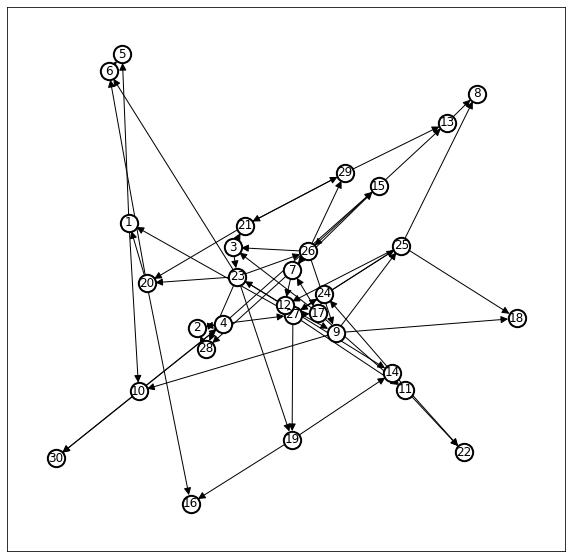

In [10]:
# Network 3
neighbors = [{1, 21, 23}, {2, 11, 21}, {3, 13, 14}, {18, 4, 14}, {11, 5, 6}, {17, 6, 23}, {2, 6, 7}, {8, 21, 15}, {9, 25, 14}, {16, 10, 4}, {8, 27, 11}, {3, 12, 30}, {21, 13, 23}, {29, 14, 30}, {16, 27, 15}, {16, 28, 13}, {3, 17, 27}, {17, 18, 14}, {16, 10, 19}, {24, 20, 28}, {3, 21, 14}, {25, 22, 7}, {9, 22, 23}, {24, 16, 15}, {24, 25, 27}, {1, 26, 6}, {1, 18, 27}, {9, 28, 4}, {26, 19, 29}, {12, 30, 7}]
# Network 2
neighbors = [{1, 3, 20}, {8, 2, 30}, {3, 28, 22}, {17, 4, 13}, {8, 28, 5}, {18, 20, 6}, {24, 22, 7}, {8, 27, 30}, {9, 18, 1}, {10, 13, 22}, {8, 11, 21}, {10, 12, 15}, {20, 12, 13}, {3, 4, 14}, {18, 30, 15}, {16, 18, 23}, {17, 4, 7}, {18, 21, 23}, {9, 10, 19}, {25, 20, 7}, {16, 13, 21}, {8, 5, 22}, {20, 7, 23}, {24, 28, 29}, {25, 30, 23}, {17, 26, 1}, {25, 27, 7}, {1, 28, 6}, {21, 11, 29}, {18, 29, 30}]
# Network 1
neighbors = [{1, 27, 20}, {2, 28, 4}, {17, 26, 3}, {10, 2, 4}, {1, 5, 6}, {20, 6, 23}, {17, 26, 7}, {8, 25, 13}, {9, 26, 12}, {1, 10, 9}, {27, 17, 11}, {25, 12, 7}, {29, 13, 15}, {19, 14, 23}, {4, 7, 15}, {16, 19, 20}, {24, 17, 27}, {25, 18, 9}, {27, 19, 23}, {20, 21, 23}, {29, 3, 21}, {11, 22, 14}, {3, 12, 23}, {24, 27, 14}, {25, 27, 9}, {26, 23, 15}, {25, 27, 4}, {28, 23, 7}, {21, 26, 29}, {10, 4, 30}] 

a = []
for i, nodes in enumerate(neighbors, 1):
    n = list(nodes-{i})
    b = str(i)+" "+str(n[0])+" "+str(n[1])
    a.append(b)
    # print(b)
G = nx.parse_adjlist(a, create_using=nx.DiGraph)

print(nx.transitivity(G), nx.average_clustering(G), nx.density(G), nx.degree_centrality(G))

options = {
        # "font_size": 10,
        # "node_size": 1000,
        "arrowsize": 15,
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 2,
        "width": 1,
    }
nx.draw_networkx(G.reverse(), **options)
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

In [11]:

import time

random.seed(6)
N = 30
neighbors_num = 2
round_num = 8
network_num = 3
 
p = False

def f(nodes_set):   
    global all_nodes_set
    global revolt_nodes_record
    global round
    global neighbors
    global thresholds
    global p
    
    global start 
    global b

    if time.time() - start > 10: 
        b = True
        return set()

    revolt_nodes = set()
    
    if (nodes_set == all_nodes_set) and (round >= 2):
        for n in revolt_nodes_record[round-2]:
            revolt_nodes.add(n)
    for n in nodes_set:
        # if nodes_set == all_nodes_set: 
        #     print(n, end=" ")
        
        # if nodes_set == all_nodes_set and n == 10 and round == 5:
        #     p = True

        # if p: print("!", n, nodes_set, "|", neighbors[n-1])

        if n not in revolt_nodes:
            if nodes_set.issubset(neighbors[n-1]):
                if len(nodes_set) >= thresholds[n-1]:
                    # print(" #", n)
                    revolt_nodes.add(n)
            else:
                if len(g(nodes_set & neighbors[n-1])) >= thresholds[n-1]:
                    revolt_nodes.add(n)
                
    return revolt_nodes

def g(nodes_set):
    global b
    if time.time() - start > 10: 
        b = True
        return set()

    # print("*", nodes_set)
    if len(nodes_set) == 1:
        return nodes_set
    else: 
        return f(nodes_set)

# == 產生 network (adjacent list) ==
all_nodes_set = set(range(1, N+1))
# Network 3
# neighbors = [{1, 21, 23}, {2, 11, 21}, {3, 13, 14}, {18, 4, 14}, {11, 5, 6}, {17, 6, 23}, {2, 6, 7}, {8, 21, 15}, {9, 25, 14}, {16, 10, 4}, {8, 27, 11}, {3, 12, 30}, {21, 13, 23}, {29, 14, 30}, {16, 27, 15}, {16, 28, 13}, {3, 17, 27}, {17, 18, 14}, {16, 10, 19}, {24, 20, 28}, {3, 21, 14}, {25, 22, 7}, {9, 22, 23}, {24, 16, 15}, {24, 25, 27}, {1, 26, 6}, {1, 18, 27}, {9, 28, 4}, {26, 19, 29}, {12, 30, 7}]
# Network 2o
neighbors = [{1, 3, 20}, {8, 2, 30}, {3, 28, 22}, {17, 4, 13}, {8, 28, 5}, {18, 20, 6}, {24, 22, 7}, {8, 27, 30}, {9, 18, 1}, {10, 13, 22}, {8, 11, 21}, {10, 12, 15}, {20, 12, 13}, {3, 4, 14}, {18, 30, 15}, {16, 18, 23}, {17, 4, 7}, {18, 21, 23}, {9, 10, 19}, {25, 20, 7}, {16, 13, 21}, {8, 5, 22}, {20, 7, 23}, {24, 28, 29}, {25, 30, 23}, {17, 26, 1}, {25, 27, 7}, {1, 28, 6}, {21, 11, 29}, {18, 29, 30}]
# Network 1
# neighbors = [{1, 27, 20}, {2, 28, 4}, {17, 26, 3}, {10, 2, 4}, {1, 5, 6}, {20, 6, 23}, {17, 26, 7}, {8, 25, 13}, {9, 26, 12}, {1, 10, 9}, {27, 17, 11}, {25, 12, 7}, {29, 13, 15}, {19, 14, 23}, {4, 7, 15}, {16, 19, 20}, {24, 17, 27}, {25, 18, 9}, {27, 19, 23}, {20, 21, 23}, {29, 3, 21}, {11, 22, 14}, {3, 12, 23}, {24, 27, 14}, {25, 27, 9}, {26, 23, 15}, {25, 27, 4}, {28, 23, 7}, {21, 26, 29}, {10, 4, 30}] 


neighbors_at_t1 = deepcopy(neighbors)
thresholds = []
for i in range(1, N+1, 2):
    thresholds.append(int(i/2)+1)
    thresholds.append(int(i/2)+1)
# print(all_nodes_set, neighbors, thresholds)

# == 開始找出各個時間點(t)誰會revolt ==
round = 1
revolt_nodes_num = []
revolt_nodes_record = []

b = False

start = time.time()
for i in range(round_num):
    if round != 1:
        # 讓自己所有 neighbor 的 neighbors，成為自己的 neighbor
        for i in range(1, N+1):
            for n in neighbors[i-1]:
                if n != i:            
                    neighbors[i-1] = (neighbors[i-1] | neighbors_at_t1[n-1])
    
    # print("\nround: ", round)
    revolt_nodes = g(all_nodes_set) 
    
    revolt_nodes_num.append(len(revolt_nodes))
    revolt_nodes_record.append(revolt_nodes)
    round += 1

print(revolt_nodes_num)
# print(revolt_nodes_record)

# a = []
# for i, nodes in enumerate(neighbors, 1):
#     n = list(nodes-{i})
#     b = str(i)
#     for y in n:
#         b+=" "+str(y)
#     a.append(b)
# G = nx.parse_adjlist(a, create_using=nx.DiGraph)
# print(nx.transitivity(G), nx.average_clustering(G), nx.density(G))
# print(nx.closeness_centrality(G))

[2, 3, 4, 12, 26, 0, 0, 0]
